In [91]:
import numpy as np # 数据处理最重要的模块
import pandas as pd # 数据处理最重要的模块
import scipy.stats as stats # 统计模块
import scipy
# import pymysql  # 导入数据库模块

from datetime import datetime # 时间模块
import statsmodels.formula.api as smf  # OLS regression

# import pyreadr # read RDS file

from matplotlib import style
import matplotlib.pyplot as plt  # 画图模块
import matplotlib.dates as mdates


from matplotlib.font_manager import FontProperties # 作图中文
from pylab import mpl
#mpl.rcParams['font.sans-serif'] = ['SimHei']
#plt.rcParams['font.family'] = 'Times New Roman'


#输出矢量图 渲染矢量图
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from IPython.core.interactiveshell import InteractiveShell # jupyter运行输出的模块
#显示每一个运行结果
InteractiveShell.ast_node_interactivity = 'all'

#设置行不限制数量
#pd.set_option('display.max_rows',None)

#设置列不限制数量
pd.set_option('display.max_columns', None)

In [92]:
from pandas.tseries.offsets import MonthEnd # 月末
Market_ret = pd.read_csv(r'C:\Users\冤种千斤\Desktop\代码\第五次作业\Marketret_mon_stock2024(1).csv')
Market_ret['month'] = pd.to_datetime(Market_ret['month'], format='%b %Y') + MonthEnd(0)
Market_ret.set_index('month', inplace=True)
Market_ret.sort_index(inplace=True)
Market_ret = Market_ret.drop(columns=['Unnamed: 0'])
Market_ret

,MarketR,MarketR_e,rfmonth,ret,ret_e,marketret3,marketret6,marketret12,Q
month,,,,,,,,,
1991-01-31,0.029998,0.036554,0.006930,0.023068,0.029624,-0.084127,-0.305662,0.254049,1991 Q1
1991-02-28,0.010203,0.021860,0.006930,0.003273,0.014930,-0.183573,-0.384745,0.241492,1991 Q1
1991-03-31,-0.099663,-0.060425,0.006930,-0.106593,-0.067355,-0.252928,-0.445049,0.288857,1991 Q1
1991-04-30,-0.079652,-0.031449,0.006651,-0.086303,-0.038100,-0.234776,-0.394937,0.691749,1991 Q2
1991-05-31,-0.074521,0.005375,0.006092,-0.080613,-0.000717,-0.236294,0.181673,1.542701,1991 Q2
...,...,...,...,...,...,...,...,...,...
2024-08-31,-0.031468,-0.033685,0.001118,-0.032586,-0.034803,0.151050,NaN,NaN,2024 Q3
2024-09-30,0.195992,0.227078,0.001118,0.194874,0.225960,0.200147,NaN,NaN,2024 Q3
2024-10-31,-0.003409,0.070220,0.001118,-0.004527,0.069102,0.000228,NaN,NaN,2024 Q4


In [93]:
inflation = pd.read_csv(r'C:\Users\冤种千斤\Desktop\代码\第五次作业\inflation(1).csv')
inflation['month'] = pd.to_datetime(inflation['month'],format='%Y/%m/%d')
inflation.set_index('month',inplace=True)
inflation

,cpi
month,
1987-01-31,5.1
1987-02-28,5.4
1987-03-31,5.8
1987-04-30,6.7
1987-05-31,7.6
...,...
2025-03-31,-0.1
2025-04-30,-0.1
2025-05-31,-0.1


In [94]:
reg_data = pd.merge(Market_ret, inflation, left_index=True, right_index=True,how='left')
reg_data

,MarketR,MarketR_e,rfmonth,ret,ret_e,marketret3,marketret6,marketret12,Q,cpi
month,,,,,,,,,,
1991-01-31,0.029998,0.036554,0.006930,0.023068,0.029624,-0.084127,-0.305662,0.254049,1991 Q1,2.2
1991-02-28,0.010203,0.021860,0.006930,0.003273,0.014930,-0.183573,-0.384745,0.241492,1991 Q1,1.0
1991-03-31,-0.099663,-0.060425,0.006930,-0.106593,-0.067355,-0.252928,-0.445049,0.288857,1991 Q1,1.6
1991-04-30,-0.079652,-0.031449,0.006651,-0.086303,-0.038100,-0.234776,-0.394937,0.691749,1991 Q2,1.3
1991-05-31,-0.074521,0.005375,0.006092,-0.080613,-0.000717,-0.236294,0.181673,1.542701,1991 Q2,3.6
...,...,...,...,...,...,...,...,...,...,...
2024-08-31,-0.031468,-0.033685,0.001118,-0.032586,-0.034803,0.151050,NaN,NaN,2024 Q3,0.6
2024-09-30,0.195992,0.227078,0.001118,0.194874,0.225960,0.200147,NaN,NaN,2024 Q3,0.4
2024-10-31,-0.003409,0.070220,0.001118,-0.004527,0.069102,0.000228,NaN,NaN,2024 Q4,0.3


In [95]:
import pandas as pd
import os
if not os.path.exists('datasets'):
    os.makedirs('datasets')  
reg_data.to_csv('datasets/reg_data.csv')
reg_data.to_excel('datasets/reg_data.xlsx')

In [96]:
reg_data = reg_data.loc['2000-01-01':]

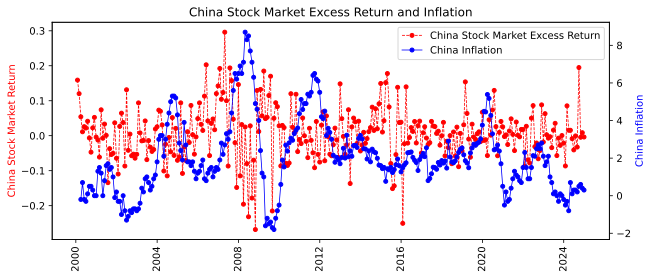

In [ ]:
# Plot the China's stock market return and inflation into one graph
fig, ax1 = plt.subplots(figsize=(10,4))
# the linewidth and marker size are set to be very small
ax1.plot(reg_data['ret'],color='red',marker='o',linewidth=0.8,
         markersize=4,
         linestyle='--',label='China Stock Market Excess Return')
ax1.set_ylabel('China Stock Market Return',color='red')
#ax1.set_xlabel('Month')
data_format = mdates.DateFormatter('%Y')
ax1.xaxis.set_major_formatter(data_format)
ax1.xaxis.set_major_locator(mdates.YearLocator())
plt.xticks(rotation = 90)
# 配置线条/标记尺寸为较小值，避免图形杂乱
# 在ax1（左轴）绘制股市超额收益曲线：
# 参数说明：
# reg_data['ret']：数据源（股市收益列）；color='red'：曲线颜色为红色；
# marker='o'：数据点标记为圆形；linewidth=0.8：线条宽度；
# markersize=4：标记尺寸；linestyle='--'：线条样式为虚线；
# label：图例中该曲线的名称
ax2 = ax1.twinx()
ax2.plot(reg_data['cpi'].shift(2),color='blue',marker='o',linewidth=0.8,
         markersize=4,
         linestyle='-',label='China Inflation')

ax2.set_ylabel('China Inflation',color='blue')

plt.title('China Stock Market Excess Return and Inflation')

# change the legend into one box
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

# save figure
fig.savefig('./China Stock Market Return and Inflation.png',dpi = 1000,bbox_inches='tight')

plt.show();

In [ ]:
reg_data[['ret','cpi']].describe().round(5)

,ret,cpi
count,300.00000,300.00000
mean,0.00668,2.02053
std,0.07576,1.92313
min,-0.26835,-1.80000
25%,-0.03981,0.80150
50%,0.00603,1.80000
75%,0.04154,2.78695
max,0.29604,8.70000


In [ ]:
import numpy as np
import pandas as pd
# 优化导入语句，更直观
from statsmodels.tsa.stattools import adfuller
print("===== 序列描述性统计（偏度、峰度） =====")
ret_skew = reg_data['ret'].skew()
ret_kurt = reg_data['ret'].kurt()
print(f"股市收益（ret）的偏度：{ret_skew:.4f}")
print(f"股市收益（ret）的峰度：{ret_kurt:.4f}")
cpi_skew = reg_data['cpi'].skew()
cpi_kurt = reg_data['cpi'].kurt()
print(f"通胀（cpi）的偏度：{cpi_skew:.4f}")
print(f"通胀（cpi）的峰度：{cpi_kurt:.4f}\n")
#判断序列是否为平稳序列
print("===== 股市收益（ret）的ADF平稳性检验 =====")
# 对股市收益序列执行ADF检验
adf_result = adfuller(reg_data['ret'].dropna())  # 先剔除缺失值，避免检验报错
# 输出ADF检验结果（清晰标注各指标含义）
print(f"ADF统计量：{adf_result[0]:.4f}")
print(f"p值（p-value）：{adf_result[1]:.4f}")
print("临界值（Critical Values）：")
# 遍历临界值字典，格式化输出
for level, value in adf_result[4].items():
    print(f"  {level}: {value:.4f}")
# 根据p值判断平稳性（显著性水平取0.05）
print("\n结论：")
if adf_result[1] <= 0.05:
    print("p-value小于0.05，拒绝原假设，该序列是平稳的。")
else:
    print("p-value大于0.05，未能拒绝原假设，该序列是非平稳的。")

===== 序列描述性统计（偏度、峰度） =====
股市收益（ret）的偏度：0.0077
股市收益（ret）的峰度：1.7083
通胀（cpi）的偏度：0.8671
通胀（cpi）的峰度：1.0478

===== 股市收益（ret）的ADF平稳性检验 =====
ADF统计量：-4.8575
p值（p-value）：0.0000
临界值（Critical Values）：
  1%: -3.4535
  5%: -2.8717
  10%: -2.5722

结论：
p-value小于0.05，拒绝原假设，该序列是平稳的。


In [101]:
reg_data['lcpi'] = reg_data['cpi'].shift(2)/100
model_cpi = smf.ols('ret ~ lcpi',
                 data=reg_data['2000-01':'2024-12']).fit()
print(model_cpi.summary())

                            OLS Regression Results                            
Dep. Variable:                    ret   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     8.852
Date:                Sun, 19 Oct 2025   Prob (F-statistic):            0.00317
Time:                        15:12:14   Log-Likelihood:                 353.13
No. Observations:                 298   AIC:                            -702.3
Df Residuals:                     296   BIC:                            -694.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0193      0.006      3.087      0.0

<ipython-input-101-8babb6ea71e7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_data['lcpi'] = reg_data['cpi'].shift(2)/100


In [ ]:
# 1. 构造滞后通胀变量（预处理）
# 对cpi列做“滞后2期”处理
# 除以100：将通胀的百分比形式（如2.5%）转换为小数形式（0.025），便于回归系数解释
reg_data['lcpi'] = reg_data['cpi'].shift(2)/100
# 2. 执行“收益对通胀的回归”分析
# cov_kws={'maxlags':6}：HAC标准误的滞后阶数设为6
model_cpi = smf.ols('ret ~ lcpi',
                    data=reg_data['2000-01':'2024-12']).fit(
                        cov_type='HAC', cov_kwds={'maxlags': 6})

# 输出回归结果的详细摘要
print(model_cpi.summary())

                            OLS Regression Results                            
Dep. Variable:                    ret   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     6.079
Date:                Sun, 19 Oct 2025   Prob (F-statistic):             0.0142
Time:                        15:13:15   Log-Likelihood:                 353.13
No. Observations:                 298   AIC:                            -702.3
Df Residuals:                     296   BIC:                            -694.9
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0193      0.007      2.673      0.0

<ipython-input-102-1b95f7316c9f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_data['lcpi'] = reg_data['cpi'].shift(2)/100


In [103]:
reg_data['lret'] = reg_data['ret'].shift(1)
model_cpi_lag = smf.ols('ret ~ lret',
                 data=reg_data['2000-01':'2024-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 6})
print(model_cpi_lag.summary())#同上

                            OLS Regression Results                            
Dep. Variable:                    ret   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     3.674
Date:                Sun, 19 Oct 2025   Prob (F-statistic):             0.0562
Time:                        15:14:25   Log-Likelihood:                 352.48
No. Observations:                 299   AIC:                            -701.0
Df Residuals:                     297   BIC:                            -693.6
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0052      0.005      1.126      0.2

<ipython-input-103-7223296c0863>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_data['lret'] = reg_data['ret'].shift(1)


Text(0.5, 1.0, "China's Stock Market")

Text(0.5, 0, 'Month')

Text(0, 0.5, 'Return')

(array([10227., 10592., 10957., 11323., 11688., 12053., 12418., 12784.,
        13149., 13514., 13879., 14245., 14610., 14975., 15340., 15706.,
        16071., 16436., 16801., 17167., 17532., 17897., 18262., 18628.,
        18993., 19358., 19723., 20089., 20454.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

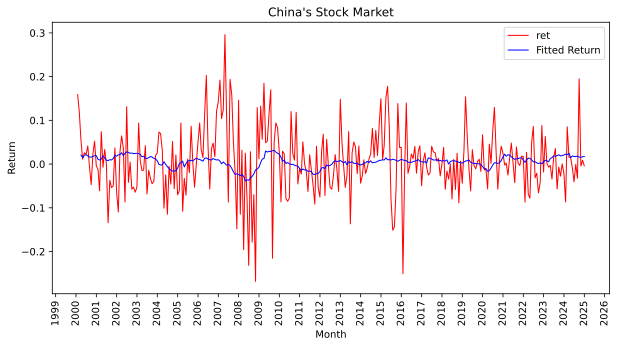

In [105]:
# 复制数据并添加回归拟合值
data = reg_data['2000-01':'2024-12'].copy()
data['fitted_return'] = model_cpi.fittedvalues  # 存储模型拟合的收益

# 创建画布+轴
fig, ax = plt.subplots(figsize=(10, 5))
# 绘制实际收益（红色）、拟合收益（蓝色）
ax.plot(data['ret'], 'r-', label='ret', linewidth=1)
ax.plot(data['fitted_return'], 'b-', label='Fitted Return', linewidth=1)

# 图表配置
ax.set_title("China's Stock Market")
ax.set_xlabel('Month')
ax.set_ylabel('Return')
# 日期格式：仅显示年份
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_major_locator(mdates.YearLocator())
plt.xticks(rotation=90)  # 旋转日期标签防重叠

plt.legend()
plt.show()

In [ ]:
Q_reg_data = reg_data['1995-01':'2024-12'].resample('Q').apply({
    'ret':
    lambda x: (1 + x).prod() - 1,
    'cpi':
    lambda x: sum(x)
})
Q_reg_data['lag_cpi'] = Q_reg_data['cpi'].shift(1)
Q_reg_data#季度

,ret,cpi,lag_cpi
month,,,
2000-03-31,0.368451,3.000000e-01,NaN
2000-06-30,0.059961,3.000000e-01,3.000000e-01
2000-09-30,-0.014135,8.000000e-01,3.000000e-01
2000-12-31,0.071593,2.800000e+00,8.000000e-01
2001-03-31,-0.004098,2.000000e+00,2.800000e+00
...,...,...,...
2023-12-31,-0.047820,-1.000000e+00,-2.000000e-01
2024-03-31,0.006789,-8.326673e-17,-1.000000e+00
2024-06-30,-0.034157,8.000000e-01,-8.326673e-17


In [108]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

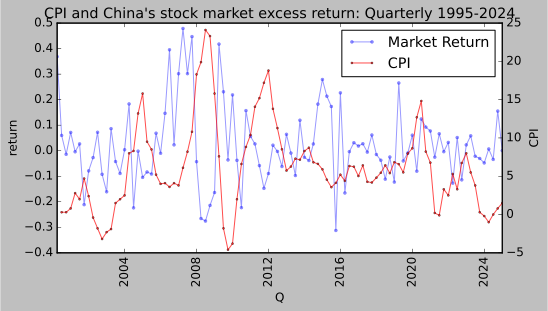

In [112]:
# Change the figure style
plt.style.use('classic')
fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(1, 1, 1)  #(x, x, x)这里前两个表示几*几的网格，最后一个表示第几子图

ax1.plot(Q_reg_data['ret'],
         color='blue',
         marker='.',
         linestyle='-',
         linewidth=1,
         markersize=6,
         alpha=0.4,
         label='Market Return')
ax1.set_xlabel('Q')  # 设置横坐标标签
ax1.set_ylabel('return')  # 设置左边纵坐标标签
#ax1.legend(loc=2)  # 设置图例在左上方
ax1.set_title("CPI and China's stock market excess return: Quarterly 1995-2024")  # 给整张图命名

# 设置x轴的日期显示格式
data_format = mdates.DateFormatter('%Y')
ax1.xaxis.set_major_formatter(data_format)
ax1.xaxis.set_major_locator(mdates.YearLocator())
plt.xticks(rotation = 90) # 转置x轴的日期显示格式

ax2 = ax1.twinx()  #twinx()函数表示共享x轴
ax2.plot(Q_reg_data['lag_cpi'],
         color='red',
         marker='o',
         linestyle='-',
         linewidth=1,
         markersize=2,
         alpha=0.7,
         label='CPI')
ax2.set_ylabel('CPI')  # 设置右边纵坐标标签
#ax2.legend(loc=1)  # 设置图例在右上方

# change the legend into one box
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

fig.savefig('Qcpi.pdf', bbox_inches='tight')
plt.show();

In [113]:
Q_reg_data['lcpi'] = Q_reg_data['cpi'].shift(1)
model_qcpi = smf.ols('ret ~ lcpi',
                 data=Q_reg_data['2000':'2024']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 2})
print(model_qcpi.summary())#同最初那个一个原理

                            OLS Regression Results                            
Dep. Variable:                    ret   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     4.408
Date:                Sun, 19 Oct 2025   Prob (F-statistic):             0.0384
Time:                        15:20:18   Log-Likelihood:                 50.322
No. Observations:                  99   AIC:                            -96.64
Df Residuals:                      97   BIC:                            -91.45
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0564      0.023      2.420      0.0

In [114]:
Q_reg_data['lret'] = Q_reg_data['ret'].shift(1)
model_qcpi_lag = smf.ols('ret ~ lret',
                 data=Q_reg_data['2000':'2024']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 2})
print(model_qcpi_lag.summary())

                            OLS Regression Results                            
Dep. Variable:                    ret   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     2.628
Date:                Sun, 19 Oct 2025   Prob (F-statistic):              0.108
Time:                        15:20:28   Log-Likelihood:                 50.384
No. Observations:                  99   AIC:                            -96.77
Df Residuals:                      97   BIC:                            -91.58
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0138      0.014      0.969      0.3

In [115]:
# 构造滞后1期的收益变量（lret：用上一期的ret作为解释变量）
Q_reg_data['lret'] = Q_reg_data['ret'].shift(1)

# 构建回归模型：被解释变量ret，解释变量为滞后通胀(lcpi)+滞后收益(lret)
# 数据范围：2000-2024年；cov_type='HAC'：用异方差-自相关稳健标准误
model_qcpi_lag = smf.ols('ret~lcpi+lret',
                        data=Q_reg_data['2000':'2024']).fit(
                            cov_type='HAC', cov_kwds={'maxlags':2})

# 输出回归结果摘要
print(model_qcpi_lag.summary())

                            OLS Regression Results                            
Dep. Variable:                    ret   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     3.727
Date:                Sun, 19 Oct 2025   Prob (F-statistic):             0.0276
Time:                        15:21:33   Log-Likelihood:                 52.212
No. Observations:                  99   AIC:                            -98.42
Df Residuals:                      96   BIC:                            -90.64
Df Model:                           2                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0455      0.019      2.409      0.0

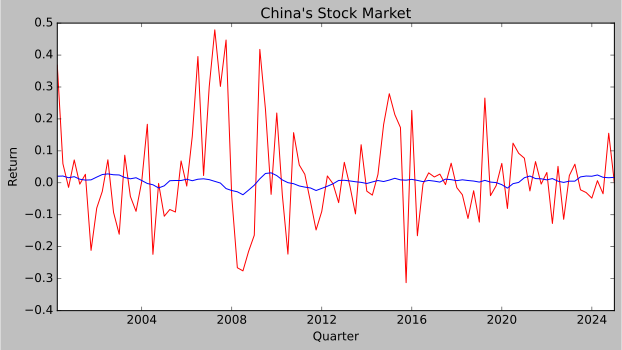

In [ ]:
data = Q_reg_data['2000-01':'2024-12'].copy()#图就正常做了
data['fitted_return'] =  model_cpi.fittedvalues

fig = plt.figure(figsize=(10, 5))
plt.plot('ret',
         '-r',
         label='ret',
         linewidth=1,
         data=data)
plt.plot('fitted_return',
         '-b',
         label='Fitted Return',
         linewidth=1,
         data=data)
plt.title("China's Stock Market")
plt.xlabel('Quarter')  # 画图的x轴名称
plt.ylabel('Return')  # 画图的y轴名称

plt.show();

In [121]:
def calculate_n_month_returns(data, n):
    """
    计算从t月到t+n-1月的累计n个月收益率
    
    Parameters:
    -----------
    data : DataFrame
        包含'MarketR'和'rfmonth'列的数据框
    n : int
        累计的月份数
    
    Returns:
    --------
    DataFrame
        包含累计市场收益率、累计无风险收益率和超额收益率的数据框
    """
    # 创建结果数据框的副本
    result = data.copy()
    
    # 计算累计市场收益率 (复利)
    market_cumret = 1
    for i in range(n):
        market_cumret = market_cumret * (1 + result['MarketR'].shift(-i))
    result[f'marketret{n}'] = market_cumret - 1
    
    # 计算累计无风险收益率 (复利)
    rf_cumret = 1
    for i in range(n):
        rf_cumret = rf_cumret * (1 + result['rfmonth'].shift(-i))
    result[f'rfret{n}'] = rf_cumret - 1
    
    # 计算超额收益率
    result[f'excessret{n}'] = result[f'marketret{n}'] - result[f'rfret{n}']
    
    return result[[f'excessret{n}']]

# 使用for循环计算不同期限的累计收益率
for n in range(3, 13, 1):
    n_month_returns = calculate_n_month_returns(reg_data, n)
    reg_data = pd.concat([reg_data, n_month_returns], axis=1)

reg_data[['excessret3', 'excessret6', 'excessret12','marketret3','marketret6','marketret12']].head(15)

,excessret3,excessret6,excessret12,marketret3,marketret6,marketret12
month,,,,,,
2000-01-31,0.369753,0.454586,0.543186,0.369753,0.454586,0.543186
2000-02-29,0.194615,0.306103,0.312229,0.194615,0.306103,0.312229
2000-03-31,0.093710,0.157335,0.096405,0.093710,0.157335,0.096405
2000-04-30,0.060182,0.045402,0.117584,0.060182,0.045402,0.117584
2000-05-31,0.091987,0.057092,0.096799,0.091987,0.057092,0.096799
2000-06-30,0.057404,0.084621,0.104917,0.057404,0.084621,0.104917
2000-07-31,-0.014184,0.056976,0.081888,-0.014184,0.056976,0.081888
2000-08-31,-0.032261,0.002051,-0.104159,-0.032261,0.002051,-0.104159
2000-09-30,0.025303,-0.053650,-0.132329,0.025303,-0.053650,-0.132329


In [122]:
reg_data#查看

,MarketR,MarketR_e,rfmonth,ret,ret_e,marketret3,marketret6,marketret12,Q,cpi,lcpi,lret,excessret3,excessret4,excessret5,excessret6,excessret7,excessret8,excessret9,excessret10,excessret11,excessret12
month,,,,,,,,,,,,,,,,,,,,,,
2000-01-31,0.160838,0.140568,0.001856,0.158982,0.138712,0.369753,0.454586,0.543186,2000 Q1,-0.2,NaN,NaN,0.369753,0.385785,0.422495,0.454586,0.516096,0.507043,0.436332,0.469643,0.548383,0.543186
2000-02-29,0.122024,0.128347,0.001856,0.120168,0.126491,0.194615,0.306103,0.312229,2000 Q1,0.7,NaN,0.158982,0.194615,0.225983,0.253371,0.306103,0.298047,0.236875,0.265313,0.332885,0.328149,0.312229
2000-03-31,0.055926,0.104864,0.001856,0.054070,0.103008,0.093710,0.157335,0.096405,2000 Q1,-0.2,-0.002,0.120168,0.093710,0.117920,0.164716,0.157335,0.102616,0.127759,0.187781,0.183358,0.168967,0.096405
2000-04-30,0.013014,0.015806,0.001856,0.011158,0.013950,0.060182,0.045402,0.117584,2000 Q2,-0.3,0.007,0.054070,0.060182,0.104405,0.097319,0.045402,0.069118,0.125863,0.121578,0.107853,0.039037,0.117584
2000-05-31,0.027691,0.039638,0.001856,0.025835,0.037782,0.091987,0.057092,0.096799,2000 Q2,0.1,-0.002,0.011158,0.091987,0.084972,0.033701,0.057092,0.113088,0.108837,0.095267,0.027315,0.104831,0.096799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-31,-0.031468,-0.033685,0.001118,-0.032586,-0.034803,0.151050,NaN,NaN,2024 Q3,0.6,0.002,-0.000624,0.151050,0.161154,0.156908,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-09-30,0.195992,0.227078,0.001118,0.194874,0.225960,0.200147,NaN,NaN,2024 Q3,0.4,0.005,-0.032586,0.200147,0.195801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-10-31,-0.003409,0.070220,0.001118,-0.004527,0.069102,0.000228,NaN,NaN,2024 Q4,0.3,0.006,0.194874,0.000228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [123]:
model_cpi_3month = smf.ols('excessret3 ~ lcpi',
                 data=reg_data['2000-01':'2024-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 6})
print(model_cpi_3month.summary())

                            OLS Regression Results                            
Dep. Variable:             excessret3   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     5.924
Date:                Sun, 19 Oct 2025   Prob (F-statistic):             0.0155
Time:                        15:26:03   Log-Likelihood:                 143.93
No. Observations:                 296   AIC:                            -283.9
Df Residuals:                     294   BIC:                            -276.5
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0580      0.022      2.617      0.0

In [124]:
# 1. 6个月累计超额收益对滞后通胀的回归
# 被解释变量：excessret6（6个月累计超额收益率）
# 解释变量：lcpi（滞后通胀）
# cov_type='HAC'：使用异方差-自相关稳健标准误（适配时间序列数据）
model_cpi_6month = smf.ols('excessret6 ~ lcpi',
                           data=reg_data['2000-01':'2024-12']).fit(
                               cov_type='HAC', cov_kwds={'maxlags': 6})
print(model_cpi_6month.summary())  # 输出回归结果

                            OLS Regression Results                            
Dep. Variable:             excessret6   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     4.065
Date:                Sun, 19 Oct 2025   Prob (F-statistic):             0.0447
Time:                        15:27:18   Log-Likelihood:                -26.479
No. Observations:                 293   AIC:                             56.96
Df Residuals:                     291   BIC:                             64.32
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1039      0.046      2.256      0.0

In [125]:
# 使用循环生成3到12个月的回归模型
for n in range(3, 13):
    model_name = f'model_cpi_{n}month'
    formula = f'excessret{n} ~ lcpi'
    
    globals()[model_name] = smf.ols(formula,
                                     data=reg_data['2000-01':'2024-12']).fit(
                                         cov_type='HAC', cov_kwds={'maxlags': 6})

In [ ]:
from statsmodels.iolib.summary2 import summary_col

info_dict = {'No. observations': lambda x: f"{int(x.nobs):d}"}

# 创建模型列表
models_list = [model_cpi]
model_names_list = ["Next Month's Return"]

# 添加3到12个月的模型
for n in range(3, 13):
    model_name = f'model_cpi_{n}month'
    models_list.append(globals()[model_name])
    model_names_list.append(f"Next {n} Months' Return")

results_table = summary_col(results=models_list,
                            float_format='%0.3f',
                            stars=True,
                            model_names=model_names_list,
                            info_dict=info_dict,
                            regressor_order=['Intercept', 'lcpi'])

results_table.add_title(
    'Table - OLS Regressions: Forecast Stock Market Return (1-12 Months)')

print(results_table)#整理结果

                                                                                                Table - OLS Regressions: Forecast Stock Market Return (1-12 Months)
                 Next Month's Return Next 3 Months' Return Next 4 Months' Return Next 5 Months' Return Next 6 Months' Return Next 7 Months' Return Next 8 Months' Return Next 9 Months' Return Next 10 Months' Return Next 11 Months' Return Next 12 Months' Return
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept        0.019***            0.058***              0.074**               0.089**               0.104**               0.117**               0.130**               0.144**               0.156*                 0.168*                 0.180*                
                 (0.007)             (0.022)            

In [127]:
reg_data['lcpi'] = reg_data['cpi'].shift(1)
model_cpiself = smf.ols('cpi~lcpi',
                 data=reg_data['2000-01':'2024-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 6})
print(model_cpiself.summary())

                            OLS Regression Results                            
Dep. Variable:                    cpi   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     1501.
Date:                Sun, 19 Oct 2025   Prob (F-statistic):          3.67e-118
Time:                        15:27:54   Log-Likelihood:                -262.10
No. Observations:                 299   AIC:                             528.2
Df Residuals:                     297   BIC:                             535.6
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0974      0.047      2.055      0.0

In [128]:
model_cpiself = smf.ols('ret~cpi',
                 data=reg_data['2000-01':'2024-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 6})
print(model_cpiself.summary())

                            OLS Regression Results                            
Dep. Variable:                    ret   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     2.704
Date:                Sun, 19 Oct 2025   Prob (F-statistic):              0.101
Time:                        15:28:01   Log-Likelihood:                 351.62
No. Observations:                 300   AIC:                            -699.2
Df Residuals:                     298   BIC:                            -691.8
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0174      0.008      2.304      0.0

In [129]:
model_cpiself = smf.ols('ret~cpi + lcpi',
                 data=reg_data['2000-01':'2024-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 6})
print(model_cpiself.summary())

                            OLS Regression Results                            
Dep. Variable:                    ret   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     3.336
Date:                Sun, 19 Oct 2025   Prob (F-statistic):             0.0369
Time:                        15:28:08   Log-Likelihood:                 353.73
No. Observations:                 299   AIC:                            -701.5
Df Residuals:                     296   BIC:                            -690.4
Df Model:                           2                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0177      0.008      2.339      0.0